In [1]:
import matplotlib.pyplot as plt
import wfdb
from ecg3d import *

Directorio donde están los archivos y nombre archivo del paciente

In [2]:
path = '../fantasia-database-1.0.0/'
subject = 'f2y02'

Leer registros y anotaciones. De los registros obtener el registro ECG. De las anotaciones obtener los picos QRS.

In [3]:
subjectPath = path + subject
record = wfdb.rdrecord(subjectPath) #Read records
annotation = wfdb.rdann(subjectPath,'ecg') #Read annotations
peaks = annotation.sample #get peaks from annotations
ecg = record.p_signal[:,1] #get ecg record

Graficar algunos segundos de la señal con la identificación de picos.

Text(0, 0.5, 'Amplitud (mV)')

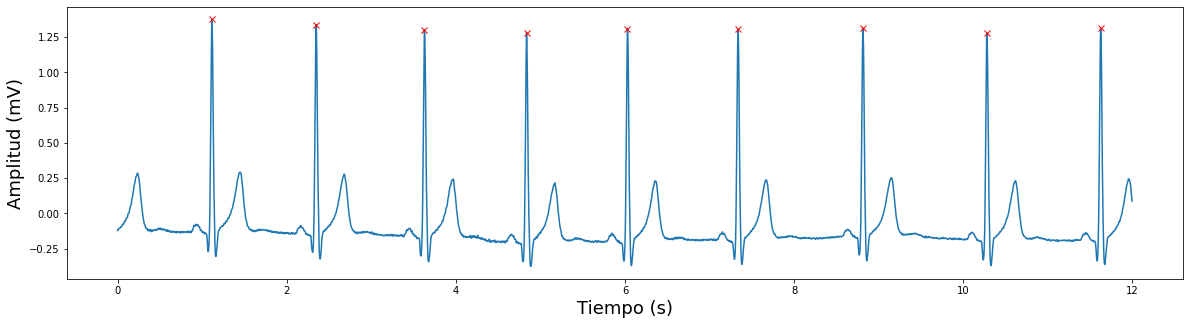

In [4]:
plt.figure(figsize=(20,5))
sec = 12
freq = 250
t = np.arange(0,sec,1/freq)
plt.plot(t,ecg[:sec*freq])
plt.plot(t[peaks[:9]-4],ecg[peaks[:9]-4],'rx')
plt.xlabel("Tiempo (s)",fontsize=18)
plt.ylabel("Amplitud (mV)",fontsize=18)

Calculamos la diferencia entre el maximo pico y todos los picos

In [5]:
maxPeak = max(ecg)
diff = np.array([maxPeak - ecg[peak] for peak in peaks])

Graficamos solo un periodo, con el pico del complejo QRS empatado en cada periodo

Text(0, 0.5, 'Amplitud (mV)')

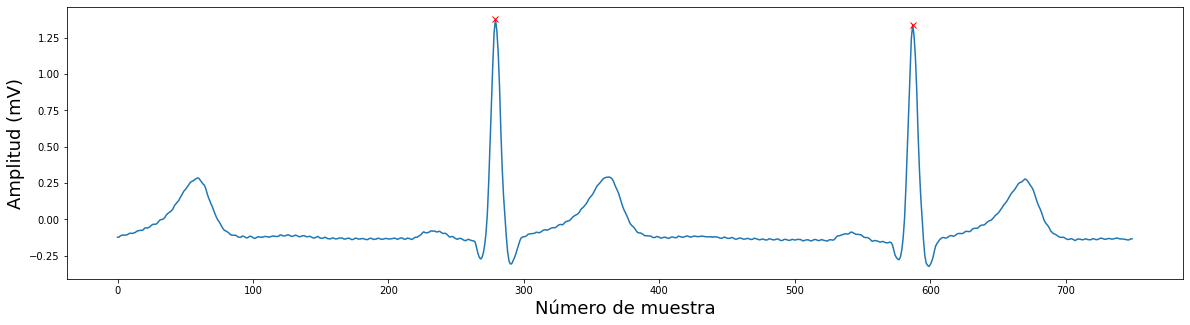

In [6]:
plt.figure(figsize=(20,5))
plt.plot(ecg[:750])
plt.plot(peaks[0:2]-4,ecg[peaks[0:2]-4],'rx')
plt.xlabel("Número de muestra",fontsize=18)
plt.ylabel("Amplitud (mV)",fontsize=18)

Descomponer la señal en periodos.

In [7]:
start = 180
before = peaks[0]-start
qrs=QRSComplex(ecg,peaks,start,before)

Numero de periodos

In [8]:
numQRS = len(qrs)
numQRS 

6574

Graficar la descomposición por periodos.

Text(0, 0.5, 'Amplitud (mV)')

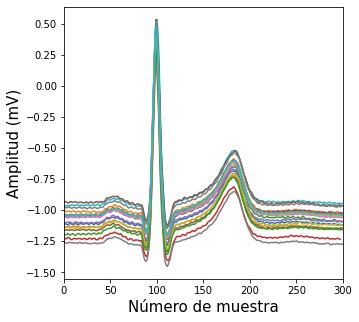

In [21]:
plt.figure(figsize=(5,5))
for qrs_p in qrs[:20]:
    plt.plot(qrs_p)
plt.xlim([0,300])
plt.xlabel("Número de muestra",fontsize=15)
plt.ylabel("Amplitud (mV)",fontsize=15)

Calcular el número de columnas de la imagen

In [10]:
max_len = maxLength(qrs) #Compute the width of image
max_len

549

Guardar cada periodo en una fila de la imagen

In [11]:
img = ECG3D(qrs)

Mostrar imagen

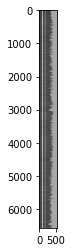

In [12]:
plt.imshow(img,cmap='gray')

Observar en 3D

<ipython-input-13-428450c9b63a>:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


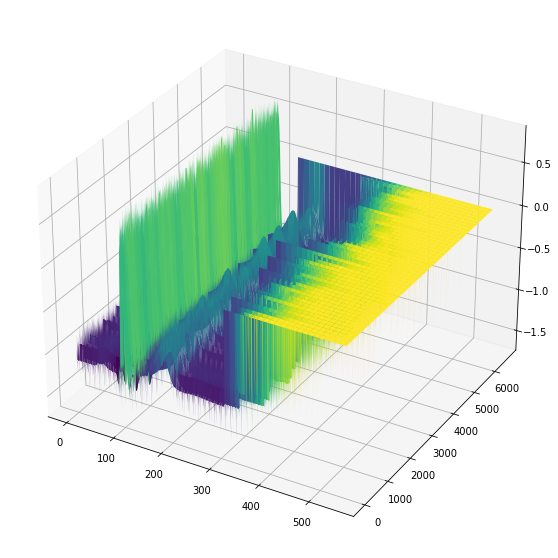

In [13]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

X = range(0, numQRS)
Y = range(0, max_len)
X, Y = np.meshgrid(X, Y)

surf = ax.plot_surface(Y,X,img.T,
                cmap='viridis', edgecolor='none')

Función para hacer ECG3D y guardarlo

In [14]:
makeECG3D(subjectPath,'ECG3D_'+subject+'.txt',start,before)